In [44]:
import pandas as pd
import numpy as np

In [45]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [73]:
len(train), len(test)

(1460, 1459)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

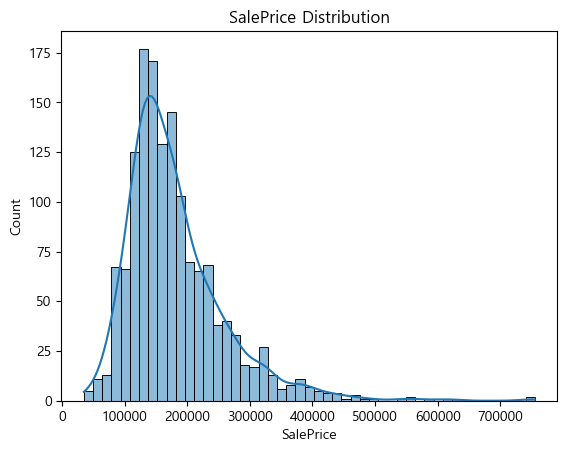

In [47]:
# ÌÉÄÍ≤ü Î∂ÑÌè¨
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()



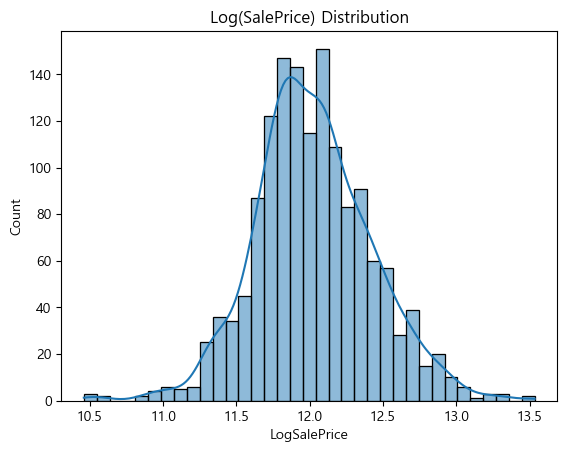

In [48]:
# ‚úîÔ∏è Ï†ïÍ∑úÏÑ± ÌåêÎã®Ïö© ÏãúÍ∞ÅÌôî (Î°úÍ∑∏ Î≥ÄÌôò)
train['LogSalePrice'] = np.log1p(train['SalePrice'])

sns.histplot(train['LogSalePrice'], kde=True)
plt.title("Log(SalePrice) Distribution")
plt.show()

In [49]:
len(train)

1460

In [50]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏ 
nulls = train.isnull().sum().sort_values(ascending=False)
print(nulls[nulls > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageCond        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [51]:
# ÏàòÏπò, Î≤îÏ£ºÌòï Ïª¨Îüº Î∂ÑÎ¶¨
numerical_feats = train.select_dtypes(include=['int64', 'float64']).columns
categorical_feats = train.select_dtypes(include=['object']).columns

print("ÏàòÏπòÌòï Î≥ÄÏàò Í∞úÏàò:", len(numerical_feats))
print("Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò:", len(categorical_feats))

ÏàòÏπòÌòï Î≥ÄÏàò Í∞úÏàò: 39
Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò: 43


In [ ]:
# ÏàòÏπòÌòï Ïª¨Îüº Ï§ëÏóêÏÑú SalePriceÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
corr_matrix = train[numerical_feats].corr()
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)

print("SalePriceÏôÄ ÏÉÅÍ¥Ä ÎÜíÏùÄ Î≥ÄÏàò:")
print(top_corr)

SalePriceÏôÄ ÏÉÅÍ¥Ä ÎÜíÏùÄ Î≥ÄÏàò:
SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


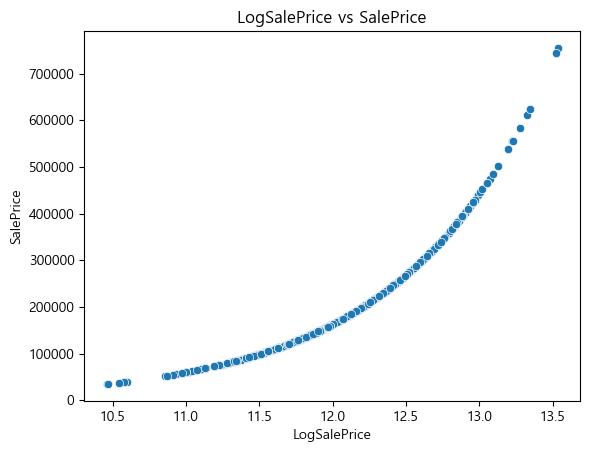

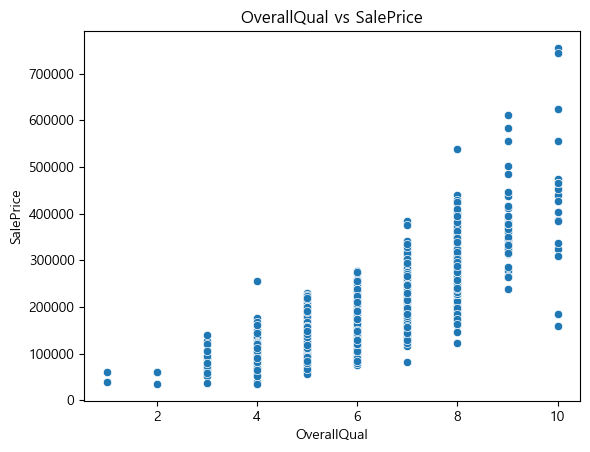

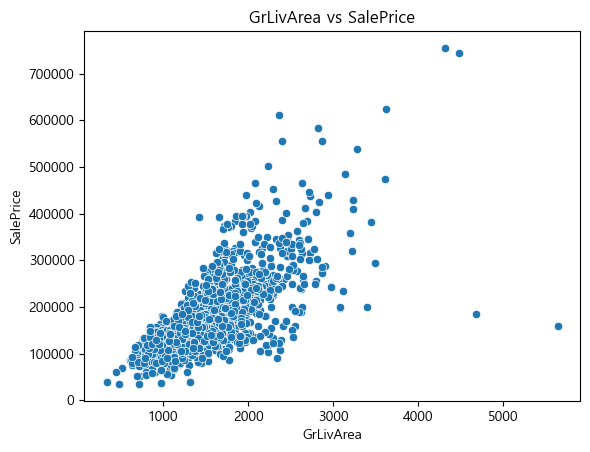

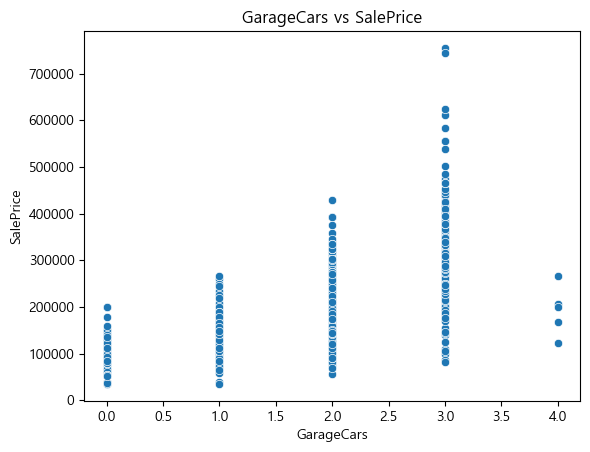

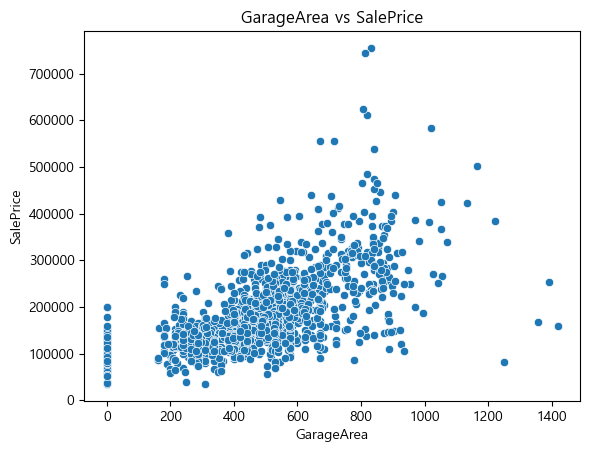

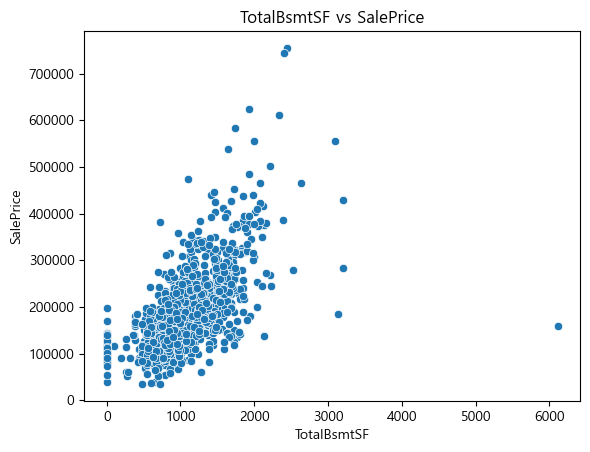

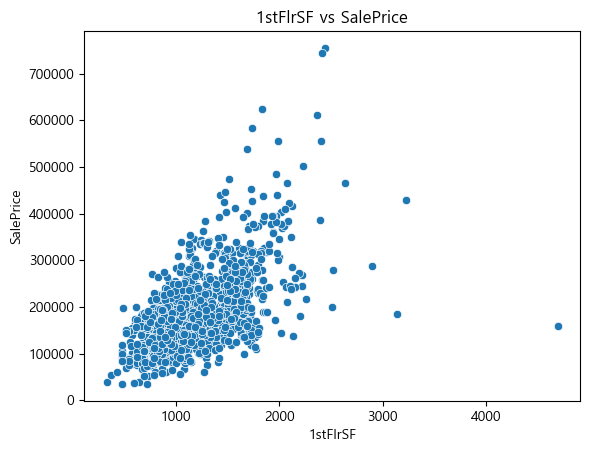

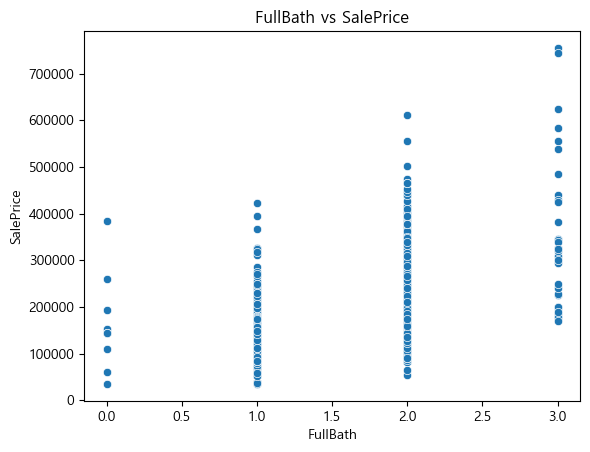

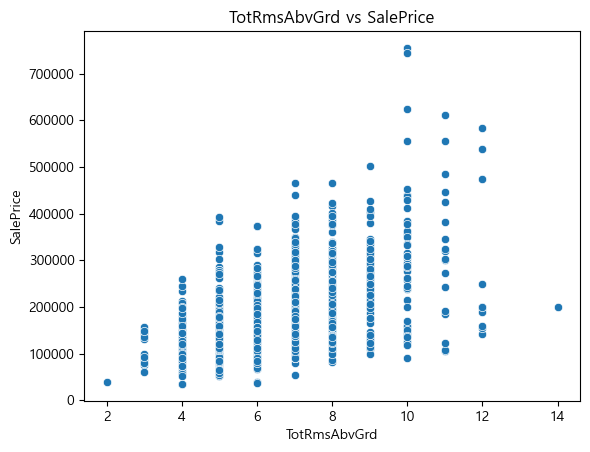

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = top_corr.index.drop("SalePrice")  # ÏûêÍ∏∞ ÏûêÏã†ÏùÄ Ï†úÏô∏

for col in top_features:
    sns.scatterplot(data=train, x=col, y='SalePrice')
    plt.title(f"{col} vs SalePrice")
    plt.show()

## üîö Í≤∞Î°†: ÌîºÏ≤ò Ìï¥ÏÑù Ï†ïÎ¶¨

| Feature       | Ïú†ÏùòÎØ∏Ìï®       | Ïù¥ÏÉÅÏπò ÏûàÏùå?     | Î≥ÄÌôò Ï∂îÏ≤ú                       |
|---------------|----------------|------------------|---------------------------------|
| OverallQual   | ‚úÖ Îß§Ïö∞ Ï§ëÏöî    | ‚ùå               | ‚ùå (Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©)                |
| GrLivArea     | ‚úÖ              | ‚úÖ               | ‚úÖ Î°úÍ∑∏Î≥ÄÌôò                     |
| GarageCars    | ‚úÖ              | ‚ùó ÏùºÎ∂Ä           | ‚ùå                              |
| GarageArea    | ‚úÖ              | ‚úÖ               | ‚ùå                              |
| TotalBsmtSF   | ‚úÖ              | ‚ùó 0 ÏûàÏùå         | ‚úÖ Î°úÍ∑∏Î≥ÄÌôò or ÌååÏÉù Î≥ÄÏàò       |
| 1stFlrSF      | ‚úÖ              | ‚úÖ               | ‚ùå                              |
| FullBath      | ‚úÖ              | ‚ùó Î∂ÑÏÇ∞ ÌÅº        | ‚ùå                              |
| TotRmsAbvGrd  | ‚≠ï ÏïΩÌï®         | ‚ùó Î¨¥ÏùòÎØ∏Ìïú Ï¶ùÍ∞Ä   | ‚ùå                              |

In [54]:
train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN    NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN    NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN    NaN         NaN       0     12   2008   
5         Lvl    AllPub  ...    NaN  MnPrv        Shed     700     10   2009   
6         Lvl    AllPub  ...    NaN    NaN         NaN       0      8   2007   
7         Lvl    AllPub  ...    NaN    NaN        Shed     350     11   2009   
8         Lvl    AllPub  ...    NaN    NaN         NaN       0      4   2008   
9         Lvl    AllPub  ...    NaN    NaN         NaN       0      1   2008   

  SaleType  SaleCondition  SalePrice  LogSalePrice  
0       WD         Normal     208500     12.247699  
1       WD         Normal     181500     12.109016  
2       WD         Normal     223500     12.317171  
3       WD        Abnorml     140000     11.849405  
4       WD         Normal     250000     12.429220  
5       WD         Normal     143000     11.870607  
6       WD         Normal     307000     12.634606  
7       WD         Normal     200000     12.206078  
8       WD        Abnorml     129900     11.774528  
9       WD         Normal     118000     11.678448  

[10 rows x 82 columns]

In [55]:
# ÏàòÏπòÌòï ÌîºÏ≤ò Ï§ë ÏÉÅÍ¥Ä ÎÜíÏùÄ Ïª¨Îüº Ï∂îÏ∂ú (SalePrice, LogSalePrice Ï†úÏô∏)
top_corr_feats = corr_matrix['SalePrice'].drop(['SalePrice', 'LogSalePrice']).sort_values(ascending=False).head(10)
print(top_corr_feats)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [56]:
selected_numerical = top_corr_feats.index.tolist()
print(selected_numerical)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [57]:
# ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ 
import os
import matplotlib.pyplot as plt
# ÏúàÎèÑÏö∞ Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïòà: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'


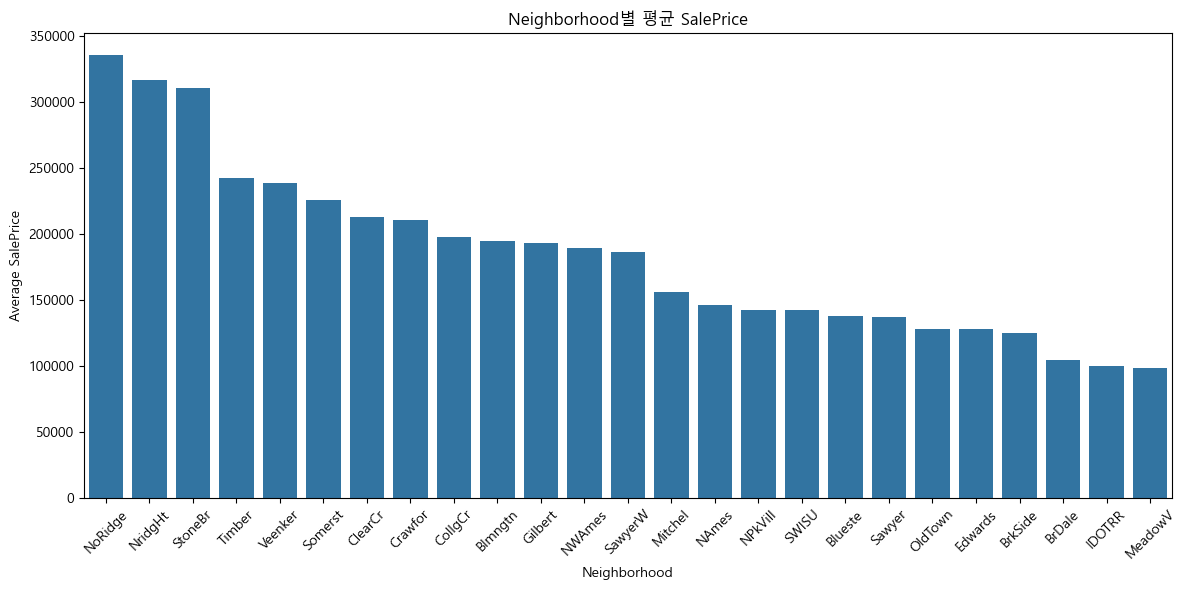

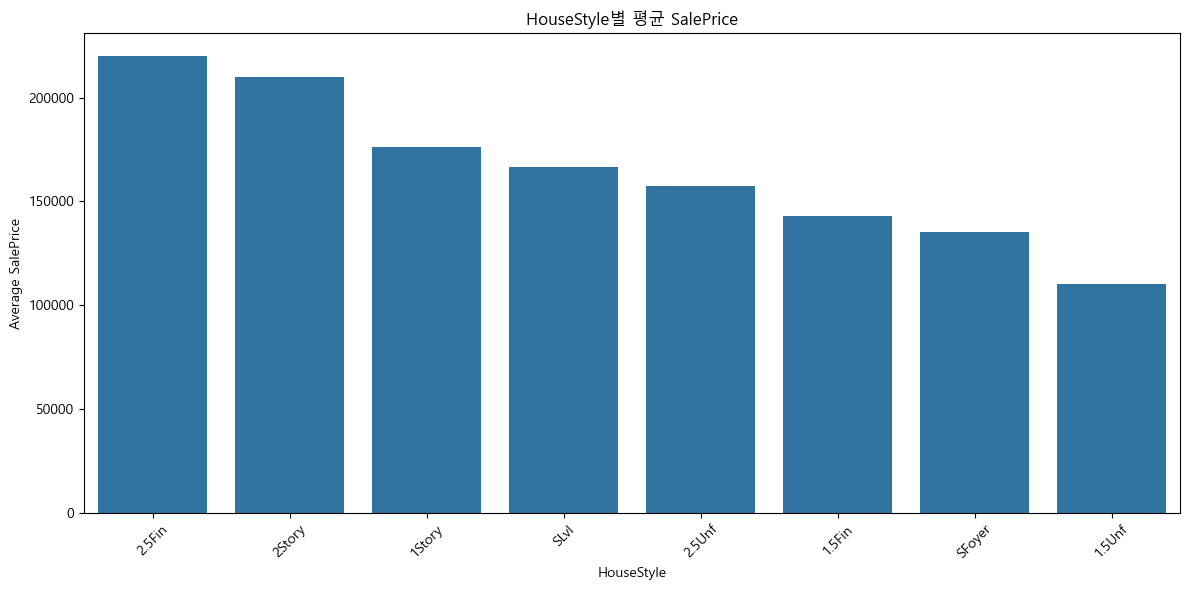

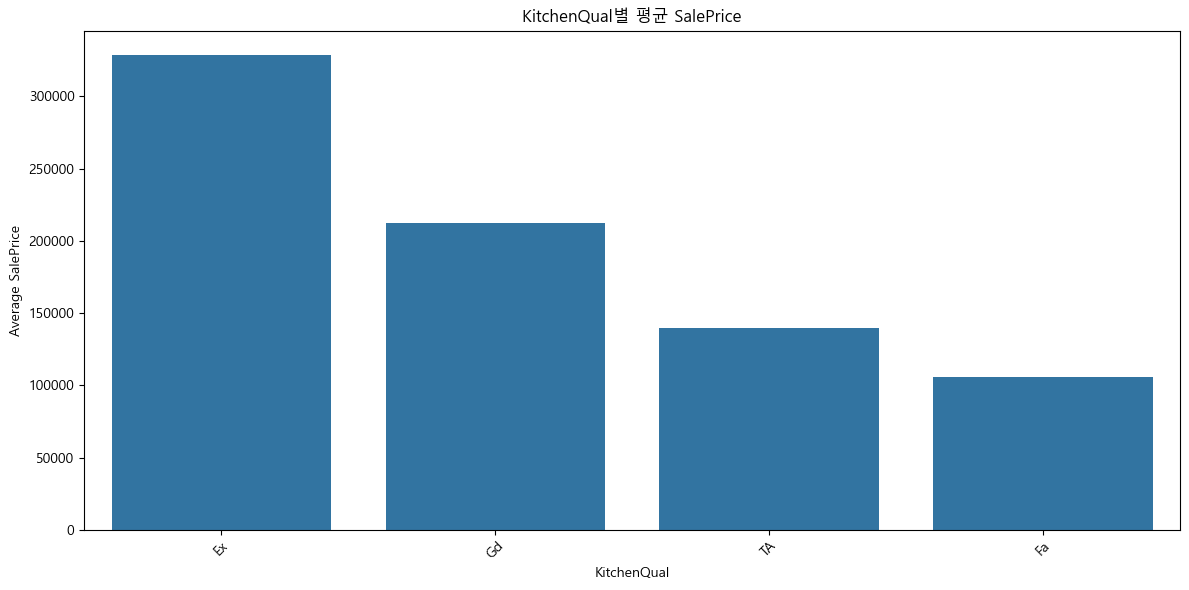

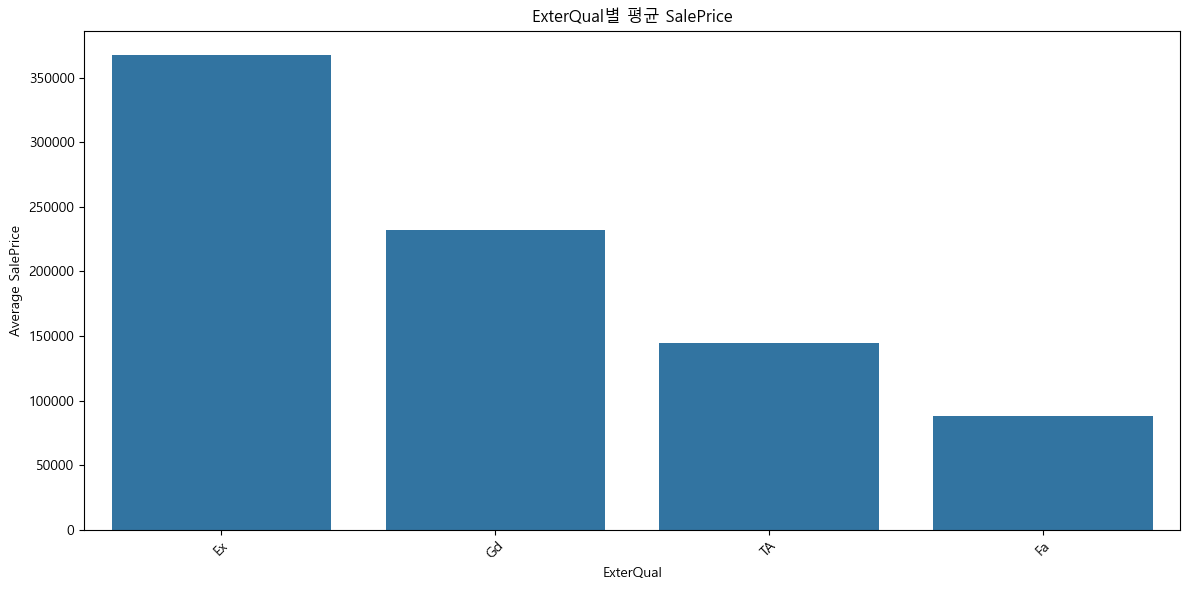

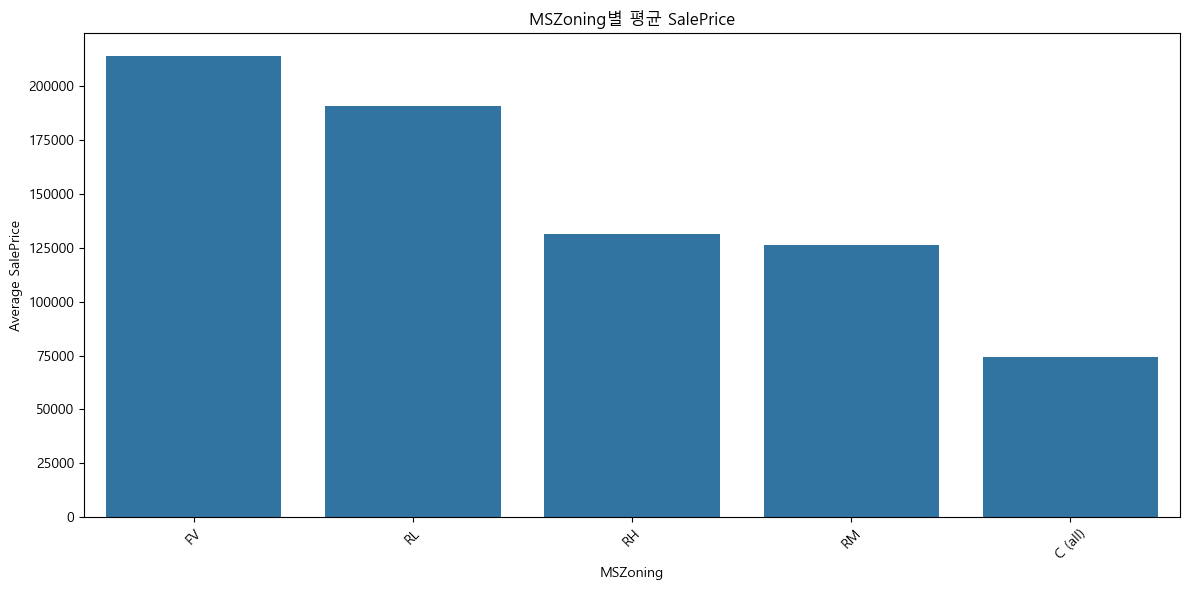

In [58]:
selected_categorical = ['Neighborhood', 'HouseStyle', 'KitchenQual', 'ExterQual', 'MSZoning']

for col in selected_categorical:
    # Î≤îÏ£ºÎ≥Ñ ÌèâÍ∑† SalePrice Í≥ÑÏÇ∞
    mean_prices = train.groupby(col)['SalePrice'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=mean_prices.index, y=mean_prices.values)
    plt.xticks(rotation=45)
    plt.title(f"{col}Î≥Ñ ÌèâÍ∑† SalePrice")
    plt.ylabel("Average SalePrice")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [59]:
# üîç Ìï¥ÏÑù Î∞©Î≤ï Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏòàÏãú
# 1. Neighborhood (ÏßÄÏó≠)
# NoRidge, NridgHt, StoneBr Îì±Ïùò ÏßÄÏó≠ÏùÄ ÌèâÍ∑† ÏßëÍ∞íÏù¥ ÎÜíÍ≥†,

# MeadowV, IDOTRR Îì±ÏùÄ ÌèâÍ∑† ÏßëÍ∞íÏù¥ ÎÇÆÏïÑ.

# üëâ Ïù¥Í±¥ Î™®Îç∏Ïóê Ï†ÅÏö© Ïãú ÏßÄÏó≠Î≥Ñ ÎçîÎØ∏ Î≥ÄÏàò(One-hot encoding) ÏÉùÏÑ±ÌïòÍ±∞ÎÇò Í≥†Í∞Ä/Ï§ëÍ∞Ä/Ï†ÄÍ∞Ä ÏßÄÏó≠ÏúºÎ°ú Î¨∂Ïñ¥ ÌååÏÉù Î≥ÄÏàòÎ°ú ÎßåÎì§Ïñ¥ÎèÑ Ï¢ãÏïÑ.

# 2. HouseStyle (Ï£ºÌÉù Ïú†Ìòï)
# 2.5FinÍ≥º 2Story Ï£ºÌÉùÏùò ÌèâÍ∑† Í∞ÄÍ≤©Ïù¥ ÎÜíÍ≥†, 1.5Unf, SFoyerÎäî ÎÇÆÏùÄ Ìé∏.

# üëâ Ï£ºÌÉù Íµ¨Ï°∞ Ïó≠Ïãú Í∞ÄÍ≤©Í≥º Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏúºÎØÄÎ°ú Ï§ëÏöîÌïú ÌîºÏ≤òÎ°ú Í∞ÑÏ£ºÌï† Ïàò ÏûàÏñ¥.

# 3. KitchenQual (Ï£ºÎ∞© ÌíàÏßà)
# Ex > Gd > TA > Fa ÏàúÏúºÎ°ú Í∞ÄÍ≤©Ïù¥ ÎöúÎ†∑ÌïòÍ≤å Îã¨ÎùºÏ†∏.

# üëâ Ïù¥Í±¥ Î™ÖÌôïÌïú ÏàúÏÑúÌòï Î≥ÄÏàòÏù¥ÎØÄÎ°ú, Label Encoding Ï≤òÎ¶¨Î•º Ìï† Ïàò ÏûàÍ≥†, Î™®Îç∏Ïù¥ Ïûò ÌôúÏö©Ìï† Ïàò ÏûàÎäî ÌîºÏ≤òÏïº.

# 4. ExterQual (Ïô∏Î∂Ä ÏûêÏû¨ ÌíàÏßà)
# KitchenQualÍ≥º ÎπÑÏä∑ÌïòÍ≤å ÌíàÏßà Îì±Í∏âÏóê Îî∞Îùº ÏßëÍ∞íÏù¥ Ï∞®Ïù¥ ÎÇò.

# üëâ ÏàúÏÑúÌòï Ïù∏ÏΩîÎî© + ÌååÏÉùÎ≥ÄÏàòÎ°úÎèÑ ÌôúÏö© Í∞ÄÎä•.

# 5. MSZoning (Ïö©ÎèÑ Íµ¨Î∂Ñ)
# FV, RL Í∞ôÏùÄ Ïö©ÎèÑÏùºÏàòÎ°ù ÎÜíÏùÄ Í∞ÄÍ≤©ÎåÄÍ∞Ä ÌòïÏÑ±ÎêòÏñ¥ ÏûàÍ≥†, C (all)ÏùÄ ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÎÇÆÏùÄ Ìé∏Ïù¥Ïïº.

# üëâ ÏßÄÏó≠ zoningÎèÑ Ï§ëÏöîÌïú Î≥ÄÏàòÏûÑÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï† Ïàò ÏûàÏñ¥.

In [60]:
# ÏàòÏπò + Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº Ìï©ÏπòÍ∏∞ 
selected_features = selected_numerical + selected_categorical

In [61]:
X_train = train[selected_features].copy()
X_test = test[selected_features].copy()
y_train = train['SalePrice']

In [62]:
# Î≤îÏ£ºÌòï ‚Üí 'None', ÏàòÏπòÌòï ‚Üí ÌèâÍ∑†
# Î≤îÏ£ºÌòï Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (X_train Í∏∞Ï§Ä ÏµúÎπàÍ∞íÏúºÎ°ú)
for col in selected_categorical:
    most_common = X_train[col].mode()[0]  # ÏµúÎπàÍ∞í
    X_train[col] = X_train[col].fillna(most_common)
    X_test[col] = X_test[col].fillna(most_common)

for col in selected_numerical:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())

In [66]:
print(X_train.columns)
print(X_test.columns)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'Neighborhood', 'HouseStyle', 'KitchenQual', 'ExterQual', 'MSZoning'],
      dtype='object')
Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'Neighborhood', 'HouseStyle', 'KitchenQual', 'ExterQual', 'MSZoning'],
      dtype='object')


In [67]:
# Î≤îÏ£ºÌòï ÌîºÏ≤ò Ïù∏ÏΩîÎî© (drop_first=TrueÎ°ú Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î∞©ÏßÄ)
X_train_encoded = pd.get_dummies(X_train, columns=selected_categorical, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=selected_categorical, drop_first=True)

# ÌòπÏãú ÌÖåÏä§Ìä∏ÏÖãÏóê ÏóÜÎäî Ïª¨ÎüºÏù¥ ÏÉùÍ≤ºÏùÑ Ïàò ÏûàÏúºÎãà ‚Üí Ïª¨Îüº ÎßûÏ∂∞Ï£ºÍ∏∞
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Î™®Îç∏ ÏÑ†Ïñ∏ Î∞è ÌïôÏäµ
model = LinearRegression()
model.fit(X_train_encoded, np.log1p(y_train))  # Î°úÍ∑∏ Î≥ÄÌôòÌïú yÎ°ú ÌïôÏäµ

LinearRegression()

In [75]:
# 2. ÏòàÏ∏°
y_pred = model.predict(X_train_encoded)

In [76]:
# 3. ÏÑ±Îä• ÌèâÍ∞Ä (RMSE)
rmse = np.sqrt(mean_squared_error(np.log1p(y_train), y_pred))
print(f"Train RMSE (log scale): {rmse:.4f}")

Train RMSE (log scale): 0.1469


In [78]:
model.coef_  # ‚Üí Í∞Å ÌîºÏ≤òÏóê ÎåÄÌïú ÌöåÍ∑Ä Í≥ÑÏàò (ÏòÅÌñ•Î†•)

array([ 7.41390109e-02,  2.38341374e-04,  5.99384507e-02,  6.84636791e-05,
        9.92441384e-05, -5.14847543e-05, -6.75017831e-03,  7.58006659e-03,
        1.22565768e-03,  1.97989399e-03,  3.75563400e-02, -7.46541539e-02,
        8.31647964e-02,  2.23051624e-01,  8.39854656e-02,  2.47693241e-01,
       -2.31789361e-02,  8.16605042e-02,  3.48945986e-02, -6.39741635e-02,
        5.10050424e-02,  7.24436213e-02,  7.79038254e-03,  8.58106750e-02,
        2.00934653e-01,  1.67772932e-01,  3.04585954e-03,  5.72595205e-02,
        5.60022514e-02,  6.78664453e-02,  9.99447061e-02,  2.16453154e-01,
        1.47140754e-01,  2.49091505e-01, -3.64741415e-02,  8.75512606e-03,
       -3.19685757e-02,  1.31110662e-02, -3.90529340e-02,  3.38347792e-02,
        3.61795564e-02, -1.49873804e-01, -6.39659808e-02, -9.82469084e-02,
       -8.20203125e-02, -1.25677856e-02, -1.04762964e-03,  4.28974650e-01,
        3.66288126e-01,  4.34156360e-01,  3.57183693e-01])

In [79]:
for col, coef in zip(X_train_encoded.columns, model.coef_):
    print(f"{col}: {coef:.4f}")

OverallQual: 0.0741
GrLivArea: 0.0002
GarageCars: 0.0599
GarageArea: 0.0001
TotalBsmtSF: 0.0001
1stFlrSF: -0.0001
FullBath: -0.0068
TotRmsAbvGrd: 0.0076
YearBuilt: 0.0012
YearRemodAdd: 0.0020
Neighborhood_Blueste: 0.0376
Neighborhood_BrDale: -0.0747
Neighborhood_BrkSide: 0.0832
Neighborhood_ClearCr: 0.2231
Neighborhood_CollgCr: 0.0840
Neighborhood_Crawfor: 0.2477
Neighborhood_Edwards: -0.0232
Neighborhood_Gilbert: 0.0817
Neighborhood_IDOTRR: 0.0349
Neighborhood_MeadowV: -0.0640
Neighborhood_Mitchel: 0.0510
Neighborhood_NAmes: 0.0724
Neighborhood_NPkVill: 0.0078
Neighborhood_NWAmes: 0.0858
Neighborhood_NoRidge: 0.2009
Neighborhood_NridgHt: 0.1678
Neighborhood_OldTown: 0.0030
Neighborhood_SWISU: 0.0573
Neighborhood_Sawyer: 0.0560
Neighborhood_SawyerW: 0.0679
Neighborhood_Somerst: 0.0999
Neighborhood_StoneBr: 0.2165
Neighborhood_Timber: 0.1471
Neighborhood_Veenker: 0.2491
HouseStyle_1.5Unf: -0.0365
HouseStyle_1Story: 0.0088
HouseStyle_2.5Fin: -0.0320
HouseStyle_2.5Unf: 0.0131
HouseStyle_2

In [77]:
# Ïã§Ï†ú ÏòàÏ∏° (ÌÖåÏä§Ìä∏ÏÖã)
test_pred = model.predict(X_test_encoded)
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": np.expm1(test_pred)  # Î°úÍ∑∏ Ïó≠Î≥ÄÌôò
})
submission.to_csv("submission_lr1.csv", index=False)
